In [2]:
%matplotlib inline
import scipy.io.wavfile as wv_file
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.signal import butter, lfilter
from scipy.fftpack import fft
import random

plt.rcParams["figure.figsize"] = (30,20)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

/usr/lib/python3/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


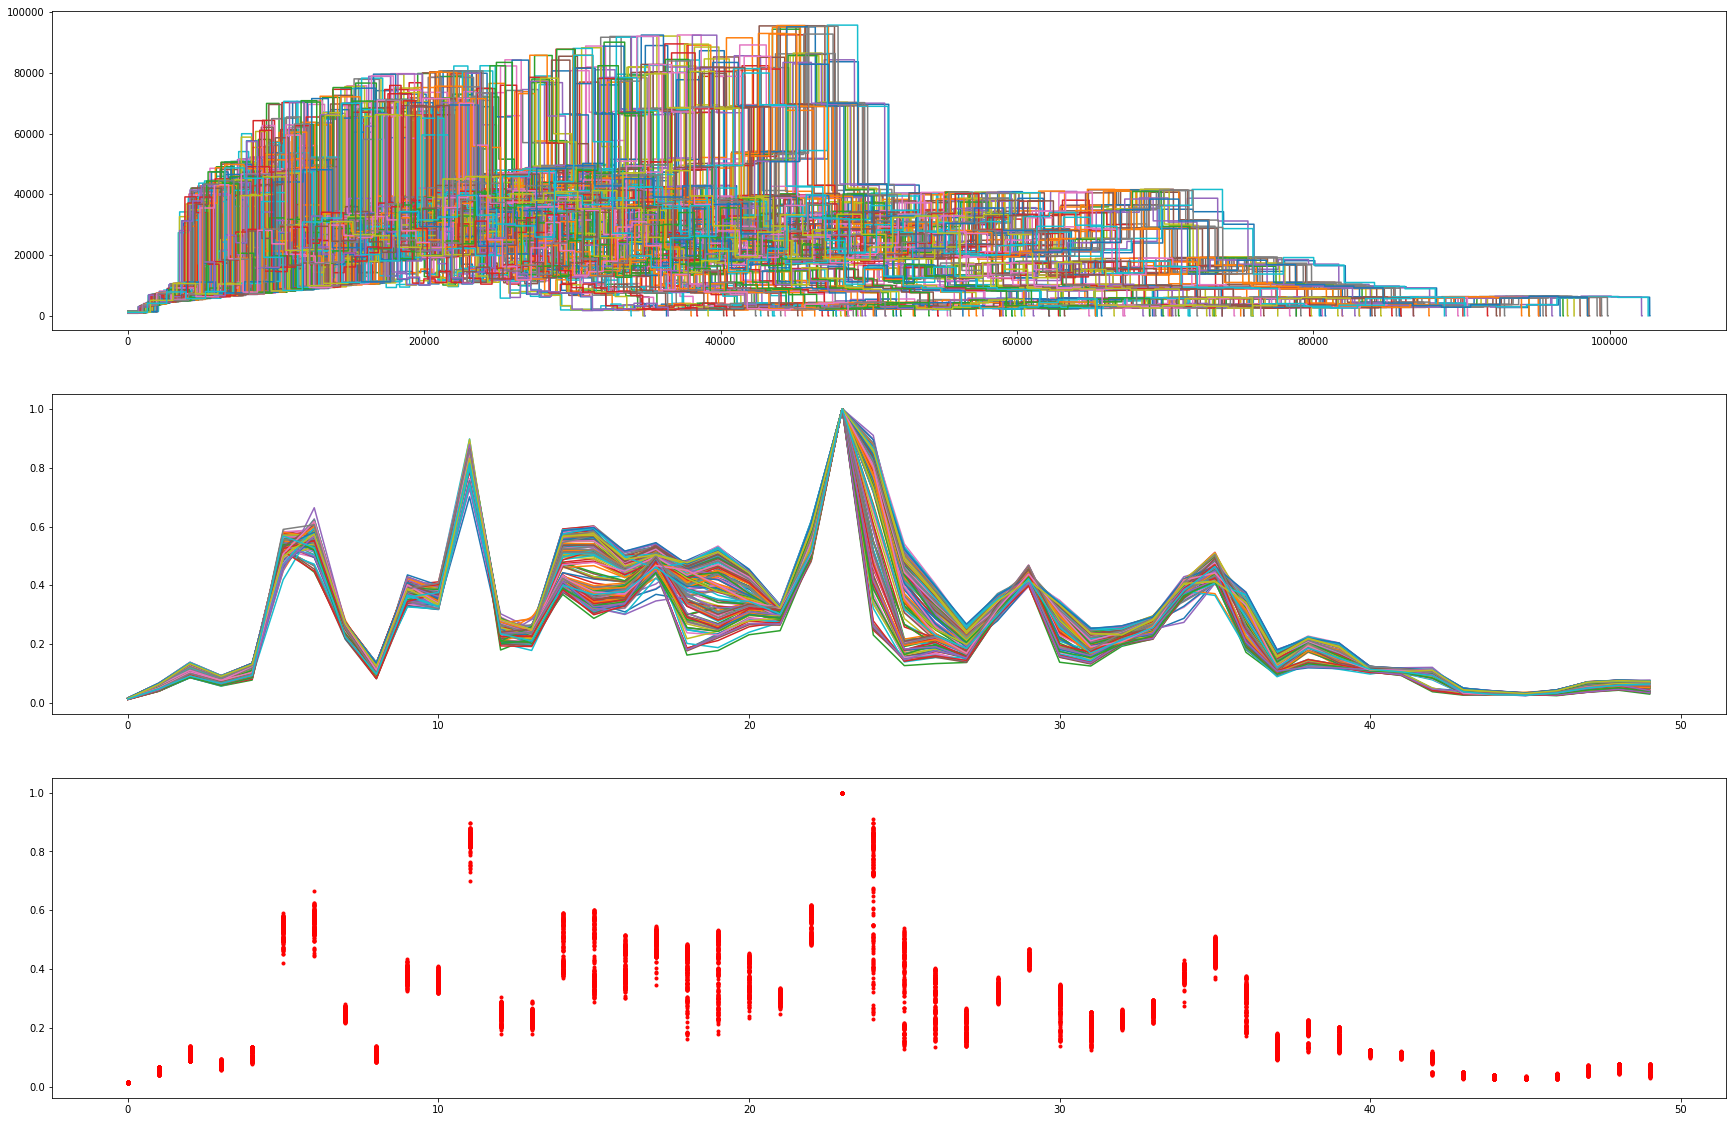

In [3]:
fs,samples_filt = wv_file.read('spasmatic_kid.wav')
features_spasm = []
samples_fil = butter_bandpass_filter(samples_filt, 6, 12000, fs, order=3)
for indx in range(0,200):
    a = random.randint(0,100)*1000
    b = random.randint(400,1000)*1000
    offset = random.randint(0,20)*10000
    sub_sample_f = samples_filt[a+offset:b+offset]
    N = len(sub_sample_f)
    T = 1/fs
    yf = fft(sub_sample_f)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    #print(a)
    #print(b)
    for i in range(0,len(xf)):
        if xf[i] > 5000:
            break
    flen = i
    freq = 2.0/N * np.abs(yf[0:N//2])
    freqs = freq[0:flen]
    bunum = 50
    wlen = int(flen/bunum)
    bucket = [0]*len(freqs)
    st = 0
    feature_vector = []
    for i in range(0,bunum):
        binval = 0
        for m in range(st,st+wlen):
            binval = binval+freqs[m]
        feature_vector.append(binval)
        for m in range(st,st+wlen):
            bucket[m] = binval
        st = m+1
    feature_vector = feature_vector/max(feature_vector)
    plt.subplot(311)
    plt.plot(bucket)
    plt.subplot(312)
    plt.plot(feature_vector)
    plt.subplot(313)
    plt.plot(feature_vector, '.r')
    #feature_vector.append(0)
    features_spasm.append(np.append(feature_vector,int(1)))

In [4]:
features_spasm

[array([ 0.01702967,  0.0676064 ,  0.13389092,  0.09082432,  0.13417828,
         0.50822651,  0.61556231,  0.27094323,  0.13533773,  0.40720659,
         0.3411266 ,  0.82300287,  0.27235086,  0.24789079,  0.58064833,
         0.59121627,  0.51185224,  0.53175858,  0.46918893,  0.51188117,
         0.43831083,  0.32058492,  0.6173734 ,  1.        ,  0.8322758 ,
         0.51448247,  0.39136454,  0.25605209,  0.36554958,  0.42299005,
         0.33493914,  0.25150157,  0.24855342,  0.2866251 ,  0.41946714,
         0.40978275,  0.36048077,  0.17488425,  0.21703461,  0.19722735,
         0.11646808,  0.11421751,  0.10956318,  0.04873408,  0.03885739,
         0.03281583,  0.04269903,  0.06966842,  0.07557901,  0.07323477,  1.        ]),
 array([ 0.01430625,  0.05220567,  0.10456205,  0.07491584,  0.10285845,
         0.54555653,  0.58918344,  0.25955887,  0.10970755,  0.39897378,
         0.36203945,  0.85059097,  0.27036261,  0.24234462,  0.427379  ,
         0.39517747,  0.40145569,  0

/usr/lib/python3/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


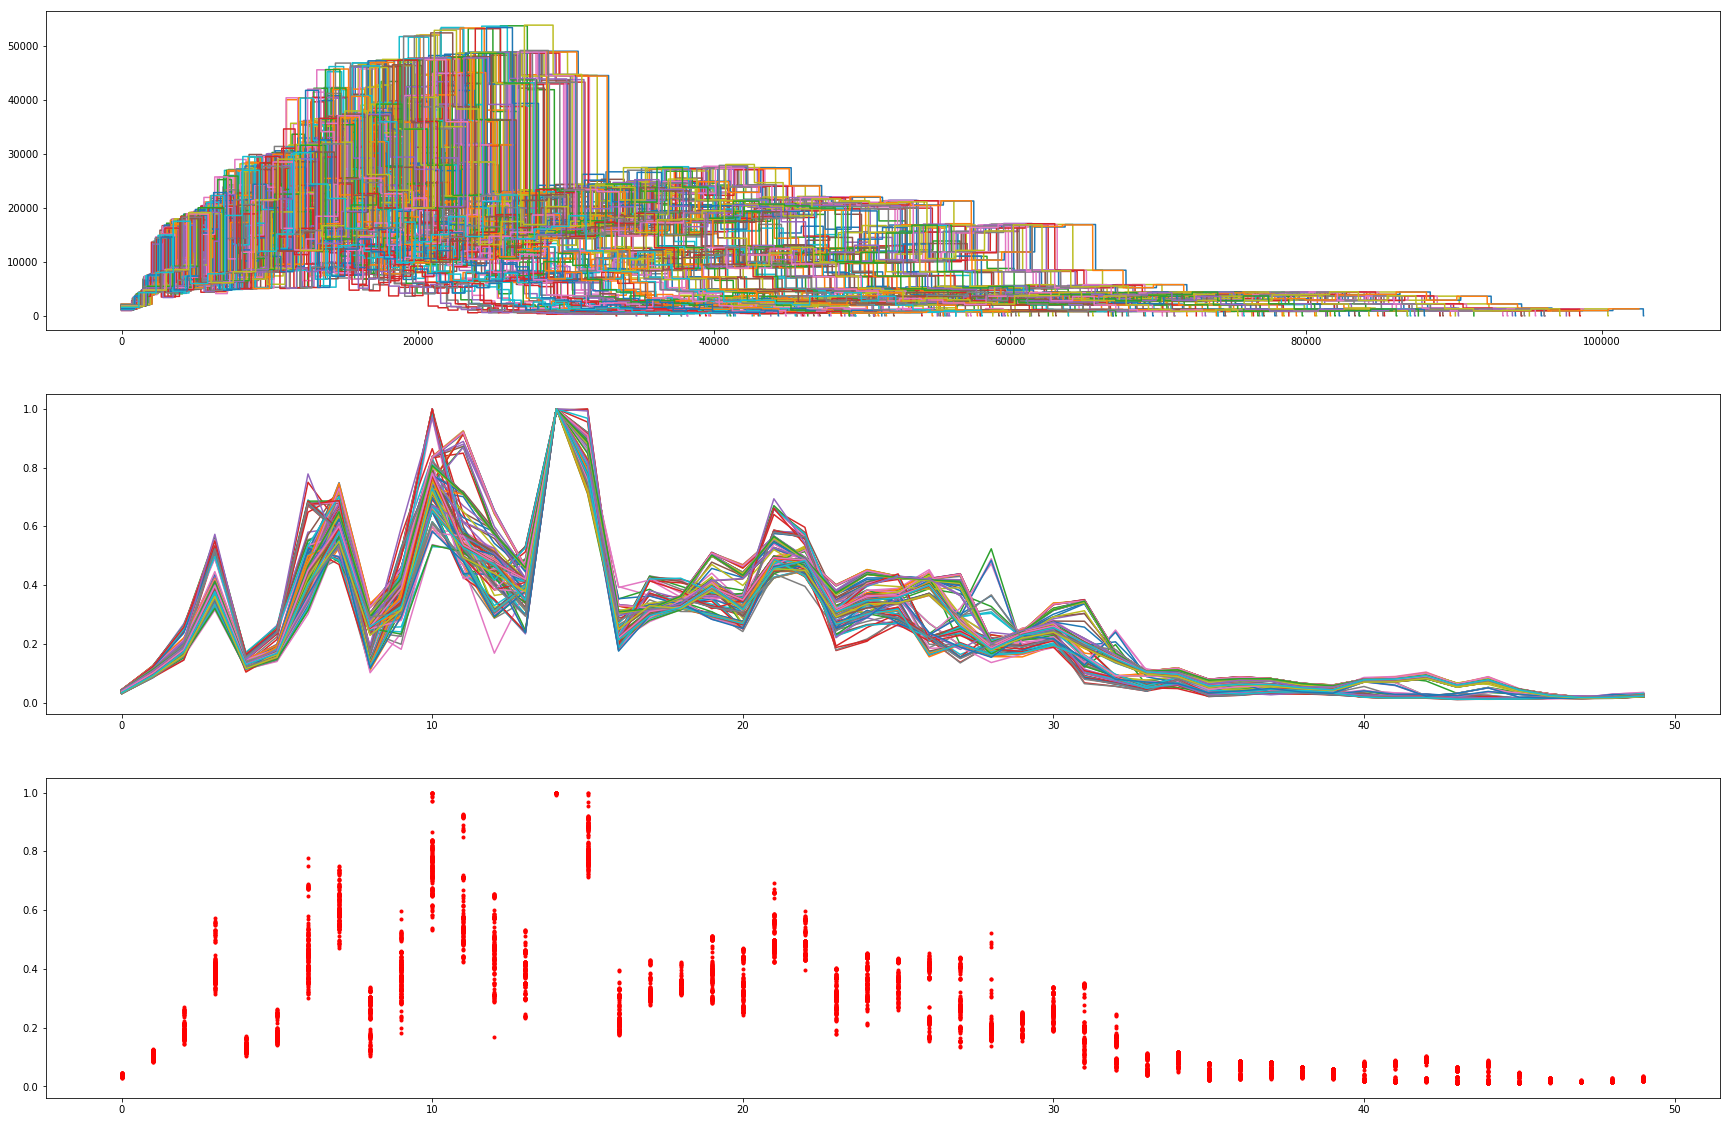

In [5]:
fs,samples_filt = wv_file.read('hunger.wav')
features_hungry = []
samples_fil = butter_bandpass_filter(samples_filt, 6, 12000, fs, order=3)
for indx in range(0,200):
    a = random.randint(0,100)*1000
    b = random.randint(400,1000)*1000
    offset = random.randint(0,20)*10000
    sub_sample_f = samples_filt[a+offset:b+offset]
    N = len(sub_sample_f)
    T = 1/fs
    yf = fft(sub_sample_f)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    #print(a)
    #print(b)
    for i in range(0,len(xf)):
        if xf[i] > 5000:
            break
    flen = i
    freq = 2.0/N * np.abs(yf[0:N//2])
    freqs = freq[0:flen]
    bunum = 50
    wlen = int(flen/bunum)
    bucket = [0]*len(freqs)
    st = 0
    feature_vector = []
    for i in range(0,bunum):
        binval = 0
        for m in range(st,st+wlen):
            binval = binval+freqs[m]
        feature_vector.append(binval)
        for m in range(st,st+wlen):
            bucket[m] = binval
        st = m+1
    feature_vector = feature_vector/max(feature_vector)                                     
    
    plt.subplot(311)
    plt.plot(bucket)
    plt.subplot(312)
    plt.plot(feature_vector)
    plt.subplot(313)
    plt.plot(feature_vector, '.r')
    #feature_vector.append(1)
    features_hungry.append(np.append(feature_vector,int(0)))

In [ ]:
op_hungry = [0]*len(features_hungry)
op_spasm = [1]*len(features_spasm)

In [6]:
a={}
a['hungry']=features_hungry

In [7]:
b={}
b['spasm']=features_spasm

In [8]:
import scipy.io as io

io.savemat('hungry_ANN.mat',a)
io.savemat('spasm_ANN.mat',b)